## En este notebook vamos a analizar los checkout y las caracteristicas de estos celulares. Ademas vamos a analizar las busquedas y ver si hay una correlacion entre los eventos.

In [40]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [41]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [42]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [43]:
checkout = events[events['event'] == 'checkout']
checkout = checkout[['timestamp', 'person','model','condition','storage','color']]
checkout.head()

,timestamp,person,model,condition,storage,color
3,2018-05-31 23:38:40,0004b0a2,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,0006a21a,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,000a54b2,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto


In [44]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 6 columns):
timestamp    33735 non-null datetime64[ns]
person       33735 non-null object
model        33733 non-null object
condition    33733 non-null object
storage      33733 non-null object
color        33733 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 1.8+ MB


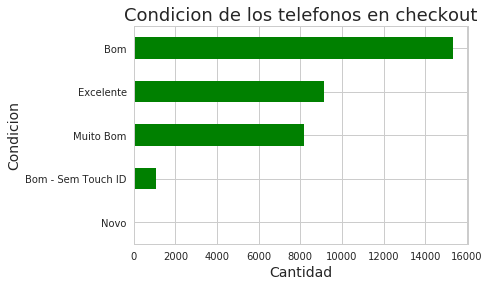

In [45]:
g = checkout['condition'].value_counts().sort_values().plot(kind = 'barh',color='green')
g.set_title('Condicion de los telefonos en checkout',fontsize = 18)
g.set_ylabel('Condicion',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

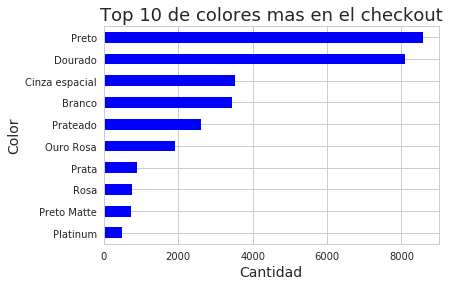

In [46]:
g = checkout['color'].value_counts().head(10).sort_values().plot(kind = 'barh',color ='blue')
g.set_title('Top 10 de colores mas en el checkout',fontsize = 18)
g.set_ylabel('Color',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

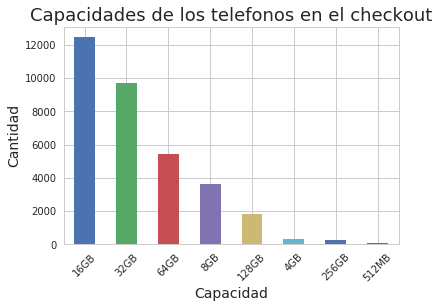

In [47]:
g = checkout['storage'].value_counts().plot(kind = 'bar', color=sns.color_palette())
g.set_title('Capacidades de los telefonos en el checkout',fontsize = 18)
g.set_xlabel('Capacidad',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

Se puede ver que los telefonos de 16GB/32GB/64GB/128GB son los que mas veces llegaron al checkout, mientras que los de menor capacidad no tiene una alta demanda, se recomienda tener mas stock de estos telefonos

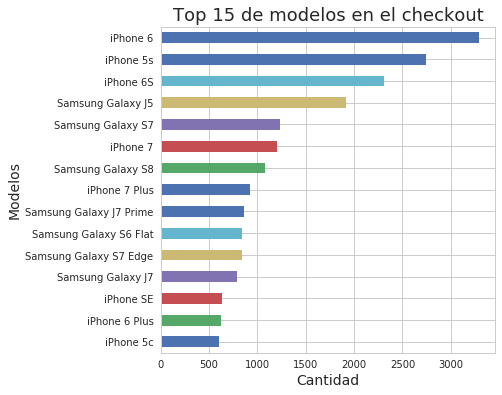

In [48]:
compras = checkout['model'].value_counts().head(15).sort_values()
g = plt.subplots(figsize = (6,6))
g = compras.plot(kind = 'barh')
g.set_title('Top 15 de modelos en el checkout',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14); 

#### Al igual que los modelos mas buscados, los iPhone son los telefonos mas demandados. En segundo lugar estan los Samsung galaxy S7, S8 y J5. 

#### Analizamos las caracteristicas de los modelos mas comprados

In [49]:
iPhone6_comprados = checkout[checkout['model'] == 'iPhone 6']
iPhone6_comprados = iPhone6_comprados[['storage','condition']]
iPhone6_comprados = pd.DataFrame(iPhone6_comprados.groupby('storage')['condition'].value_counts())
iPhone6_comprados = iPhone6_comprados.rename(columns = {'condition':'cantidad'})
iPhone6_comprados = iPhone6_comprados.reset_index()
iPhone6_comprados = iPhone6_comprados.rename(columns = {'storage':'capacidad'})
iPhone6_comprados = iPhone6_comprados.pivot('capacidad','condition','cantidad')
iPhone6_comprados

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
capacidad,,,,
128GB,110,5,60,60
16GB,903,284,438,298
64GB,524,10,326,277


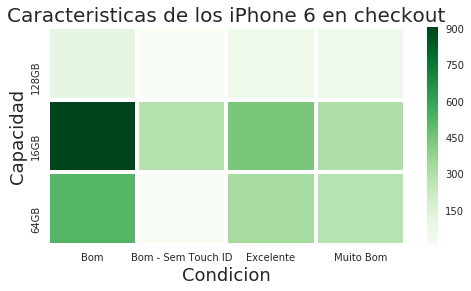

In [50]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(iPhone6_comprados,linewidth = 3, cmap = 'Greens')
ax.set_title('Caracteristicas de los iPhone 6 en checkout',Fontsize = 20)
ax.set_ylabel('Capacidad',Fontsize = 18)
ax.set_xlabel('Condicion',fontsize = 18);

In [51]:
#Se podria analizar las marcas y comparar tambien
#Conviene hacer un grafico de los modelos mas comprados teniendo en cuenta sus capacidades?

¿Los clientes quedan conformes con el servicio brindado?

In [52]:
checkout['person'].value_counts().mean() #en promedio la persona que compro una ves no esta volviendo a comprar, se esta haciendo
                                         #poca publicidad sobre la gente que ya compro? Estan quedando satisfechos con el servicio?
                                         #Los productos son buenos entonces la gente no tiene que volver a comprar? Hay que tener en cuenta
                                         #que los datos son solo del 2018

1.22122067767159

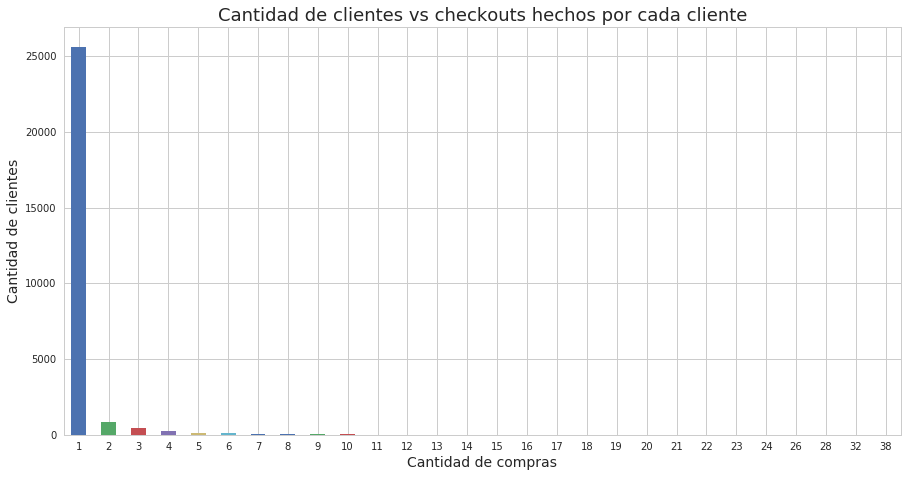

In [53]:
g = checkout['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
g.set_title('Cantidad de clientes vs checkouts hechos por cada cliente',fontsize = 18)
g.set_xlabel('Cantidad de compras',fontsize = 14)
g.set_ylabel('Cantidad de clientes',fontsize = 14);
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 10);

#### Se puede ver en el grafico que la gran mayoria de los compadores no vuelven a comprar, se podria realizar algun tipo de encuesta para saber si quedan satisfechos con el serviocio brindado

#### ¿Cuando hay mayor actividad en el checkout a lo largo de la semana?

In [54]:
dias = checkout['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       4621
Tuesday      5928
Wednesday    5772
Thursday     5559
Friday       5244
Saturday     3474
Sunday       3137
Name: timestamp, dtype: int64

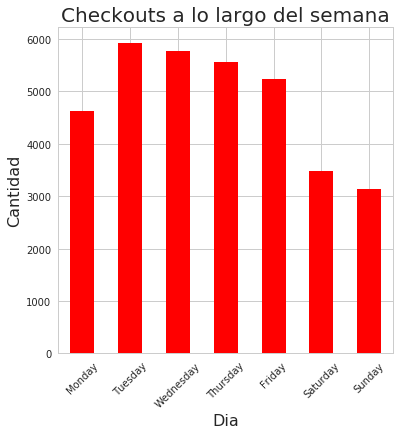

In [55]:
#este grafico deberia empezar de 1?
g = plt.subplots(figsize = (6,6))
g = dias.plot(kind = 'bar',color='red')
g.set_title('Checkouts a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

#### ¿Cuando hubo mayor actividad en el checkout a lo largo del año?

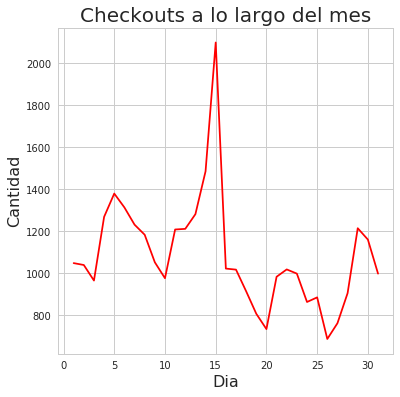

In [56]:
compras = checkout['timestamp'].dt.day.value_counts().sort_index()#este grafico deberia empezar de 1? mostrar 1,7,14,21,28?
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g.set_title('Checkouts a lo largo del mes',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

#### ¿Cuando hubo mayor actividad de ventas a lo largo del año?

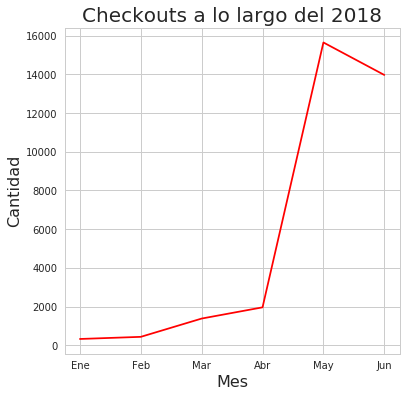

In [57]:
compras = checkout['timestamp'].dt.month.value_counts().sort_index() 
compras.index = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun']
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g.set_title('Checkouts a lo largo del 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([0,1, 2,3, 4, 5], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun'], rotation=0);  

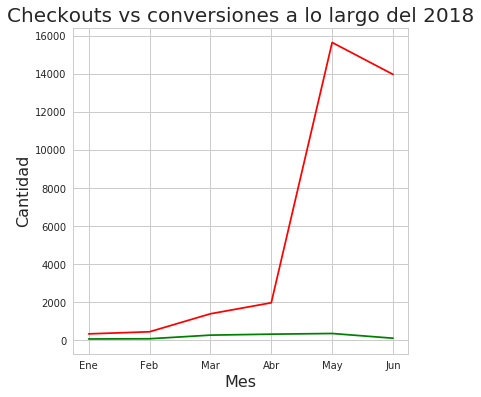

In [58]:
conv = events[events['event'] == 'conversion']['timestamp'].dt.month.value_counts().sort_index() 
conv.index = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun']
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g = conv.plot(color='green')
g.set_title('Checkouts vs conversiones a lo largo del 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);
plt.xticks([0,1, 2,3, 4, 5], ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun'], rotation=0);  

#### Checkout del primer trimestre vs checkout en el segundo trimestre

In [59]:
primer_trimestre = checkout[checkout['timestamp'].dt.month < 4]['timestamp'].dt.month.value_counts().sort_index()
segundo_trimestre = checkout[checkout['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()

In [60]:
trimestres = pd.DataFrame({'First term':primer_trimestre.values,'Second term':segundo_trimestre.values})

#### #hay que darle algun nombre a lo que sigue

In [61]:
events['marca'] = events['model'].str.split(' ').str[0]
events['modelo'] = events['model'].str.split(' ').str[1].fillna('') + ' ' + events['model'].str.split(' ').str[2].fillna('')
events[['marca', 'modelo']].head()

,marca,modelo
0,NaN,
1,NaN,
2,iPhone,5s
3,iPhone,5s
4,Samsung,Galaxy S8


In [62]:
events.groupby('marca').agg({'event':'count'}).sort_values(by = 'event', ascending = False)

,event
marca,
iPhone,256585
Samsung,218127
Motorola,63518
LG,9724
Sony,7025
Lenovo,4779
Asus,2091
iPad,1914
Quantum,520


In [63]:
events.groupby(['marca', 'model']).agg({'event':'count'}).sort_values(by = 'event', ascending = False).head(15)

event
marca   model                        
iPhone  iPhone 6                50916
        iPhone 5s               44878
        iPhone 6S               39296
        iPhone 7                27556
Samsung Samsung Galaxy S7 Edge  23926
        Samsung Galaxy S7       19337
iPhone  iPhone 7 Plus           18792
Samsung Samsung Galaxy S8       16959
iPhone  iPhone SE               16531
Samsung Samsung Galaxy J5       13044
iPhone  iPhone 6S Plus          12855
        iPhone 6 Plus           12766
        iPhone 5c               12689
Samsung Samsung Galaxy S6 Flat  11608
        Samsung Galaxy S6 Edge  11175

In [64]:
viewed_events = events[events['event'] == 'viewed product']
leaded_events = events[events['event'] == 'lead']
conversion_events = events[events['event'] == 'conversion']
checkouted_events = events[events['event'] == 'checkout']

Text(0,0.5,'Cantidad')

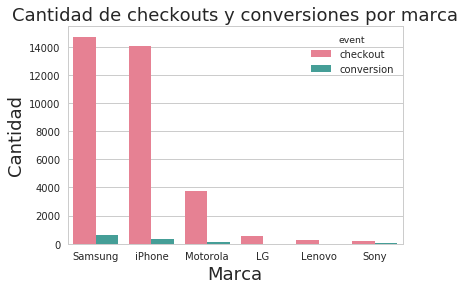

In [65]:
checkouted_vs_converted = events[(events['event'] == 'conversion') | (events['event'] == 'checkout')]
checkouted_vs_converted
pd.crosstab(checkouted_vs_converted.marca, checkouted_vs_converted.event)

g = sns.countplot(x="marca"[:5], hue="event", data=checkouted_vs_converted, palette="husl", hue_order = checkouted_vs_converted.event.value_counts().iloc[:2].index,
                 order = checkouted_vs_converted.marca.value_counts().iloc[:6].index)
g.set_title("Cantidad de checkouts y conversiones por marca", fontsize=18)
g.set_xlabel("Marca", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)